# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
POP_MEAN=98.6
np.random.seed(42)
df = pd.read_csv('data/human_body_temperature.csv')
#perform initial EDA by Graphing swarm plot. Looks like there may be some outliers 
#_=sns.boxplot( y='temperature', data= df)
ndf=df

ndf=ndf[(ndf.temperature>96.5) ]
ndf=ndf[(ndf.temperature<100.5)]
plt.subplot(1,2,1)
_=sns.boxplot( y='temperature', data= ndf)
plt.subplot(1,2,2)
_=sns.boxplot( y='temperature', data= df)
plt.show()

print('the mean:', ndf.temperature.mean(), 'the std:',  ndf.temperature.std(), df.temperature.std())

#The outliers have a pretty sigificant effect on the std so we are better off without outliers

<Figure size 640x480 with 2 Axes>

('the mean:', 98.25905511811027, 'the std:', 0.6643237796733381, 0.7331831580389456)


First We check for Normality. We will do this graphically by creating a cdf. If the cdf of our data overlaps with a sample we create to mimic the normal distribution, we will know that our data is normal.

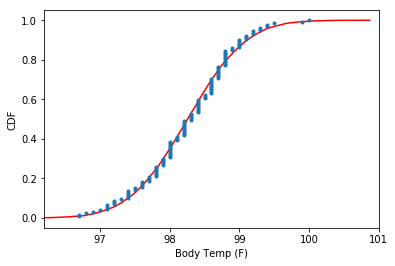

In [2]:
# Create ecdf function to test normality. If the functions overlap than the distribution will appear to be normal
def ecdf(data):
    data= np.array(data)
    n=float(len(data))
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x, y
x_temp,y_temp= ecdf(ndf.temperature)
#find mean and std so we can sample a normal distribution with similar characteristics 
mean= ndf['temperature'].mean()
std= ndf['temperature'].std()
samples= np.random.normal(mean,std, size= 10000)
x_theor, y_theor= ecdf(samples)
_=plt.plot(x_theor, y_theor, color='red')
_=plt.plot(x_temp, y_temp , linestyle='none', marker='.')
_=plt.xlim((96.2, 101 ))
_=plt.xlabel ('Body Temp (F)')
_=plt.ylabel('CDF')

plt.show()

#The curves overlap well so I am confident the distribution is normal
#With 128 observations that appear to be independent, I am confident the Central Limit Theorem holds

The data appears to be normal. A general rule of thumb is that more than 30 observations is an aptly large sample so with over 100 we should be fine.

Next, we establish a hypothesis test to see if our mean is significantly different then that of the population

In [3]:
# h0 is mean= 98.6 h1 is mean != 98.6. h0= The true mean of our sample is 98.6. 
#The test stat will be the difference between the mean and the pop. mean

#create a varibale for the observed difference for later comparison
obs=mean-POP_MEAN
#shift the temerature by the pop mean for sampling. 
temp_shifted= np.array(ndf['temperature']-mean+POP_MEAN)
bs_sam= np.random.choice(temp_shifted, size=(len(temp_shifted)))
#compute the p value. The logic being, if the difference in the samples is greater than 
p= np.sum(np.abs(bs_sam-POP_MEAN)>=np.abs(obs))/float(len(bs_sam))
print('The p value is ', p)
#The p value is around 65% which suggests we cannot reject the null according to the bootstrap test. 


('The p value is ', 0.6771653543307087)


Next we do a similar analysis but this time with the t-test

In [4]:
# A one sample test is pertinent because the established population mean. 


tstat, p_val= stats.ttest_1samp(ndf['temperature'], POP_MEAN)

print('the tstat is: ', tstat, 'the p value is: ', p_val)
#The p value is exordinarily low. One of these numbers is certainly incorrect. 
#This p value would have us reject the null

('the tstat is: ', -5.783706384348704, 'the p value is: ', 5.442748024045431e-08)


The test revealed vastly different p values. I am more inclined to trust the bootstrappig method because t-tests typically work better when the sample size is smaller

In [5]:
z_score = (mean-POP_MEAN)/std
z_score
#With a z score of -.51 about 39% of the normal distribution is extreme to the same amount. 
#This would cause us not to reject the nul


-0.5132209508703358

The large difference in p values is once again suspicious. The z test closely aligns with the result of the bootstrap test. This is due to the large number of samples conforming to a normal distribution.

In [12]:
#For a small sample size, the t stat is perferrable because it is more effective in smallr samples


small_sam= np.random.choice(ndf['temperature'], size= 10)
tstat_small, p_val_small= stats.ttest_1samp(small_sam, POP_MEAN)
z_score_small= (small_sam.mean()-POP_MEAN)/small_sam.std()
print('the tstat for the small sample is: ', tstat_small, 'the p value of the small sample, according to the t-test is:',
       p_val_small)
print('the z score was:' ,z_score_small, 'meaning the pvalue is about 54%, although the reading vary alot')


('the tstat for the small sample is: ', -0.6348110542726619, 'the p value of the small sample, according to the t-test is:', 0.5413512976457331)
('the z score was:', -0.21160368475755398, 'meaning the pvalue is about 54%, although the reading vary alot')


With such a small sample I would definetely use the t-stat, but even with the t-stat the p value varies significantly. This is the issue with small sample sizes

In [11]:
#Statistically abnormal is a value outside of the 95% confidence interval
#The first way we will check with the standard error. By computing the standard error and multiplying
#it by the appropriate z score, you get the difference between the mean and edge of your interval.

error= (std/(np.sqrt(len(ndf.temperature))))*1.96
#The second way we will check the CI is by simply finding the interval in our oown data
lower_bound, upper_bound= np.percentile(ndf.temperature ,(2.5 ,97.5))
print('frequentist method shows the 95% confidence interval is between'
      , mean-error, 'and', mean+error)
print('bootstrapping shows the 95% confidence interval is between', lower_bound, 'and',upper_bound  )


('frequentist method shows the 95% confidence interval is between', 98.14351468018067, 'and', 98.37459555603986)
('bootstrapping shows the 95% confidence interval is between', 96.915, 'and', 99.4)


The second method produces a wider interval. This suggests that while the variance is low,but the numbers are well distributed throughout

I felt that bootstrap sample was the best way to solve this problem because I was able to generate a large number of simulations to build a more robust data set

In [13]:

#h0 is that men and women have the same range of body temeratures

def bootstrap_replicate(data, func):
    data= np.array(data)
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)
    return bs_replicates

                     
male= df[df.gender=='M']
female= df[df.gender=='F']
male= np.array(male.temperature)
female= np.array(female.temperature) 
diff= np.mean(male)-np.mean(female)
male_shift=male-np.mean(male)+np.mean(df.temperature)
female_shift=female-np.mean(female)+np.mean(df.temperature)
male_bs_sample= draw_bs_reps(male_shift, np.mean, size=1000)
female_bs_sample= draw_bs_reps(female_shift, np.mean, size=1000)
p_val_gender=np.sum(male_bs_sample-female_bs_sample<= diff)/float(len(male_bs_sample))
print('the p value  is', p_val_gender, 'which means our results are significant at a 5% level')


('the p value  is', 0.008, 'which means our results are significant at a 5% level')


The p value is low meaning we can reject the null that mean and women have the same body temperature